# Pós-Graduação - Ciência de Dados & Big Data

## Pontifícia Universidade Católica de Minas Gerais (PUC-MG)

### Aluno: Victor Hugo Negrisoli

### Modelos Estatísticos - Correlação, Regressão Linear Simples e Múltipla

#### Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from IPython.display import Image
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Função para configurar os plots da Matplotlib

In [2]:
def configurar_plot_com_dimensoes(titulo, x, y, h, w):
    plt.title(titulo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.gcf().set_size_inches(h, w)
    plt.show()

In [3]:
def configurar_plot(titulo, x, y):
    configurar_plot_com_dimensoes(titulo, x, y, 16, 8)

#### Importando e transformando os dados

In [4]:
dados = pd.read_csv('dados/06 - correl_ex1.csv', encoding='ansi')

In [5]:
dados.head()

,Semana,Nº de comerciais,Volume de vendas (100 reais)
0,1,2,50
1,2,5,57
2,3,1,41
3,4,3,54
4,5,4,54


In [6]:
dados = dados.rename(columns = {
    'Semana': 'semana',
    'Nº de comerciais': 'qtd_comerciais', 
    'Volume de vendas (100 reais)': 'vol_vendas'
})

dados

,semana,qtd_comerciais,vol_vendas
0,1,2,50
1,2,5,57
2,3,1,41
3,4,3,54
4,5,4,54
5,6,1,38
6,7,5,63
7,8,3,48
8,9,4,59
9,10,2,46


#### Rápida análise exploratória sobre os dados

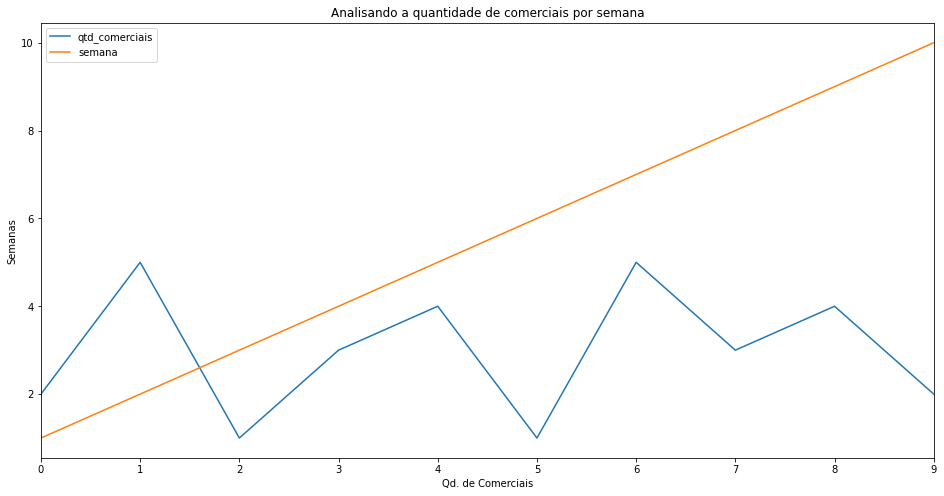

In [7]:
dados[['qtd_comerciais', 'semana']].plot(kind='line')
configurar_plot('Analisando a quantidade de comerciais por semana', 'Qd. de Comerciais', "Semanas")

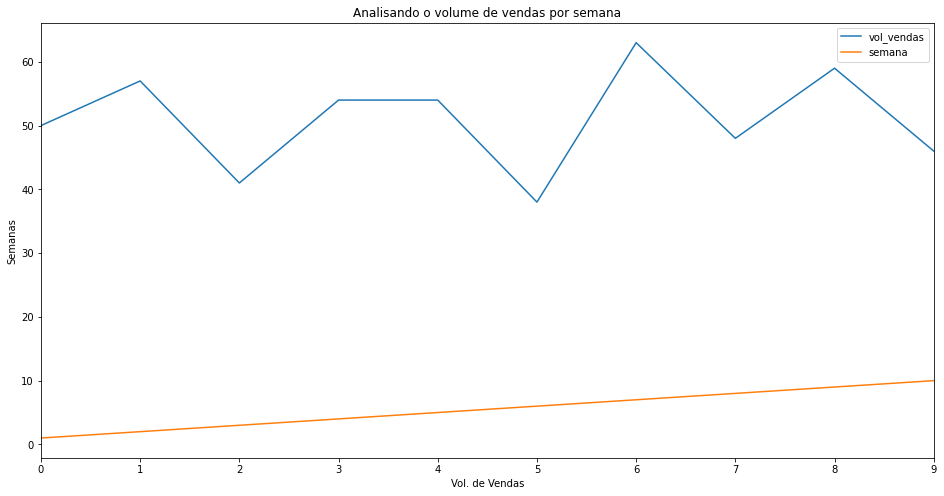

In [8]:
dados[['vol_vendas', 'semana']].plot(kind='line')
configurar_plot('Analisando o volume de vendas por semana', 'Vol. de Vendas', "Semanas")

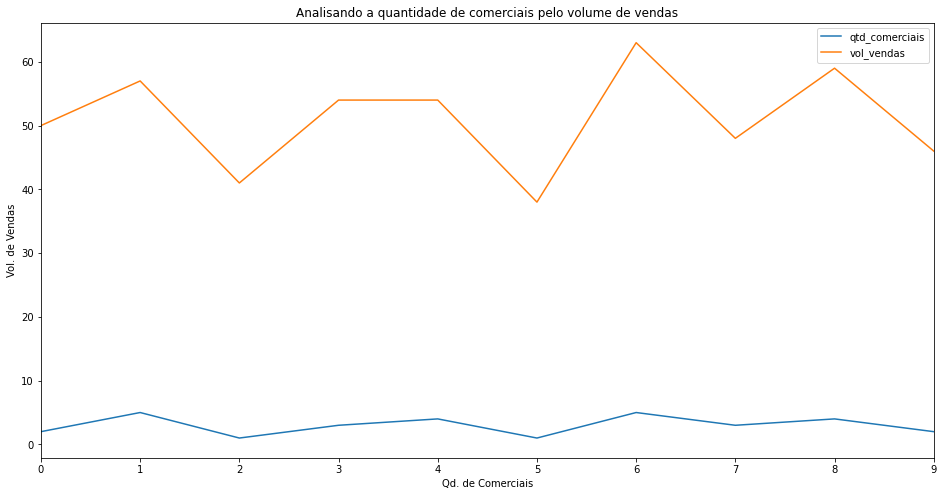

In [9]:
dados[['qtd_comerciais', 'vol_vendas']].plot(kind='line')
configurar_plot('Analisando a quantidade de comerciais pelo volume de vendas', 'Qd. de Comerciais', 'Vol. de Vendas')

#### Implementando a correlação de pearson via fórmula (sem uso da SciPy)

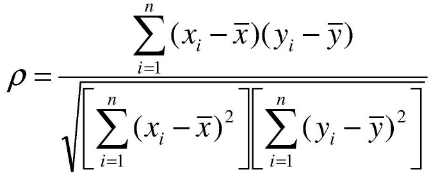

In [10]:
Image(filename = 'imgs/correlacao_pearson.png', width=300, height=300)

In [11]:
def raiz(v):
    return math.sqrt(v)

n = dados['semana'].size
x = dados['semana']
y = dados['vol_vendas']

In [12]:
def realizar_correlacao(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    
    return sum((x - x_mean) * (y - y_mean)) / raiz( sum(pow(x - x_mean, 2)) * sum( pow(y - y_mean, 2) ))

In [13]:
correlacao = realizar_correlacao(x, y)
correlacao

0.05553235050940941

#### Utilizando a função de pearsonr da SciPy

In [14]:
correlacao_pearson = pearsonr(dados['semana'], dados['vol_vendas'])

coeficiente = correlacao_pearson[0]
valor_p = correlacao_pearson[1]

In [15]:
coeficiente

0.055532350509409426

In [16]:
valor_p

0.878896906536397

#### Agora, vamos refazer os testes utilizando a variável qtd_comerciais como y

In [17]:
y = dados['qtd_comerciais']

correlacao_implementada = realizar_correlacao(x, y)
correlacao_pearson = pearsonr(x, y)
coeficiente_scipy = correlacao_pearson[0]
valor_p = correlacao_pearson[1]

print(correlacao_implementada)
print(coeficiente_scipy)
print(valor_p)

0.07385489458759964
0.07385489458759964
0.8393207610060259


#### Como vimos, todas possuem baixa correlação. Vamos verificar agora a correlação entre a quantidade de comerciais e o volume de vendas

In [18]:
x = dados['qtd_comerciais']
y = dados['vol_vendas']

correlacao_implementada = realizar_correlacao(x, y)
correlacao_pearson = pearsonr(x, y)
coeficiente_scipy = correlacao_pearson[0]
valor_p = correlacao_pearson[1]

print(correlacao_implementada)
print(coeficiente_scipy)
print(valor_p)

0.9304905807411791
0.9304905807411791
9.385534016441817e-05


Podemos visualizar que entre essas duas variáveis temos um alto grau de correlação, pois seus valores são próximos de 1.

### Verificando a dispersão das variáveis

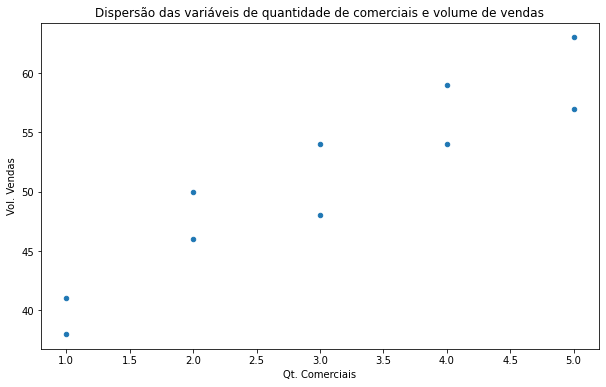

In [19]:
dados.plot.scatter('qtd_comerciais', 'vol_vendas')

configurar_plot_com_dimensoes(
    'Dispersão das variáveis de quantidade de comerciais e volume de vendas', 
    'Qt. Comerciais', 
    'Vol. Vendas',
    10,
    6
)

### Regressão Linear Simples

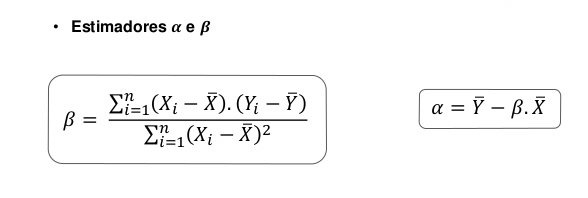

In [20]:
Image(filename = 'imgs/regressao_linear_simples.png', width=700, height=400)

In [21]:
x = dados['qtd_comerciais']
y = dados['vol_vendas']

### Realizando a regressão linear com a Scikit-Learn, treinando um modelo

#### Dividindo o dataset entre treino e teste, com 33% de treino.

In [22]:
x_np = x.values
y_np = y.values

x_treino, x_teste, y_treino, y_teste = train_test_split(x_np, y_np, test_size = 0.33, random_state = 42)

print('Dados: {}'.format(dados))
print('\n')
print('X: {}'.format(x_np))
print('\n')
print('Y: {}'.format(y_np))

print('\n')
print('X Treino: {}'.format(x_treino))
print('\n')
print('Y Treino: {}'.format(y_treino))

print('\n')
print('X Teste: {}'.format(x_teste))
print('\n')
print('Y Teste: {}'.format(y_teste))

Dados:    semana  qtd_comerciais  vol_vendas
0       1               2          50
1       2               5          57
2       3               1          41
3       4               3          54
4       5               4          54
5       6               1          38
6       7               5          63
7       8               3          48
8       9               4          59
9      10               2          46


X: [2 5 1 3 4 1 5 3 4 2]


Y: [50 57 41 54 54 38 63 48 59 46]


X Treino: [3 1 2 4 3 5]


Y Treino: [48 41 46 54 54 63]


X Teste: [4 5 1 2]


Y Teste: [59 57 38 50]


In [23]:
x_treino = x_treino.reshape(-1, 1) 
y_treino = y_treino.reshape(-1, 1) 

x_teste = x_teste.reshape(-1, 1) 
y_teste = y_teste.reshape(-1, 1) 

#### Criando o modelo de testes e instanciando a classe de Regressão Linear

In [24]:
reg = LinearRegression()
reg.fit(x_treino, y_treino)

p = reg.predict(x_teste)

print(p)

[[56.2]
 [61.4]
 [40.6]
 [45.8]]


#### Plotando os resultados da regressão treinada

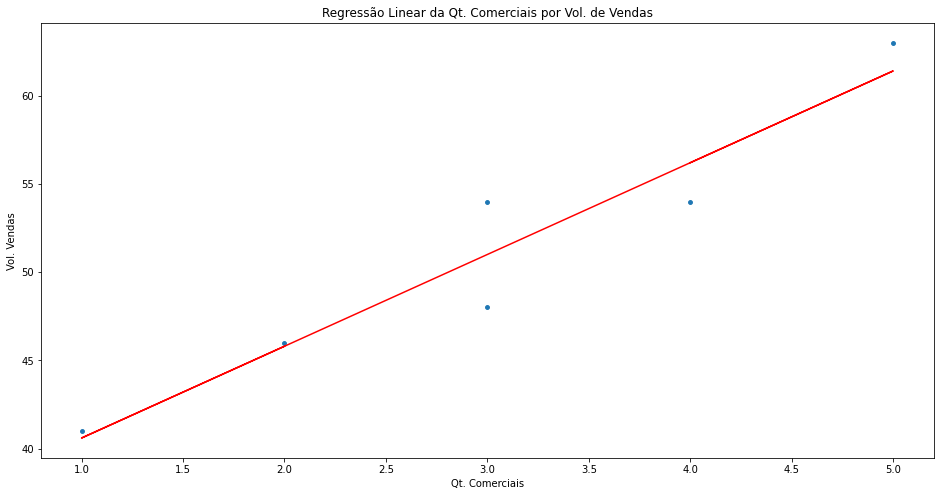

In [25]:
plt.scatter(x_treino, y_treino, s = 15)
plt.plot(x_teste, p, color='r')
configurar_plot('Regressão Linear da Qt. Comerciais por Vol. de Vendas', 'Qt. Comerciais', 'Vol. Vendas')

#### Realizando o teste R2 sobre os datasets de treino e teste e visualizando sua acurácia

In [26]:
r2_treino = reg.score(x_treino, y_treino)
r2_teste = reg.score(x_teste, y_teste)

print(r2_treino)
print(r2_teste)

0.9135135135135134
0.8088888888888889


### Realizando a regressão linear facilmente utilizando a biblioteca Seaborn

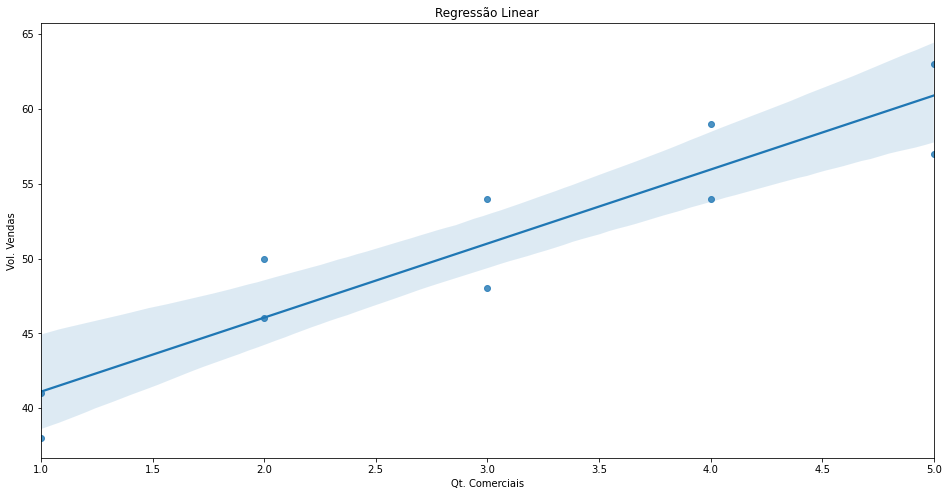

In [27]:
sns.regplot(x = x, y = y, data = dados)

configurar_plot('Regressão Linear', 'Qt. Comerciais', 'Vol. Vendas')

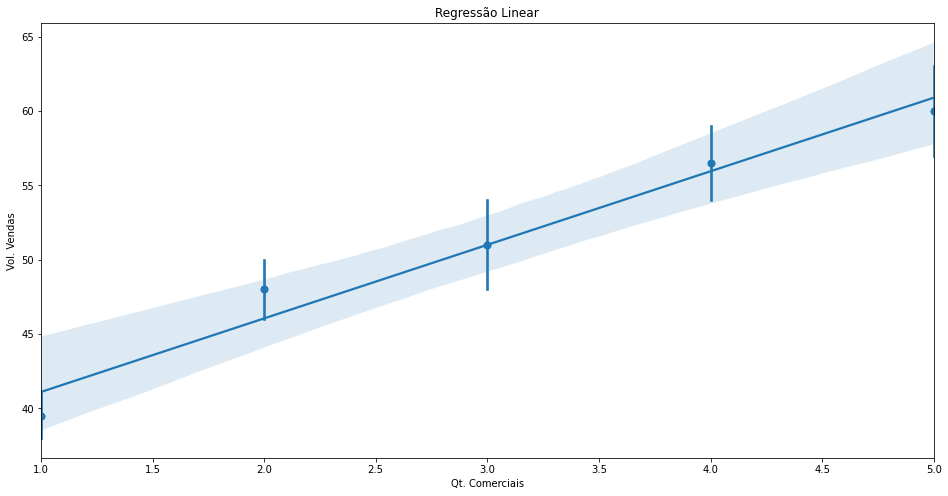

In [28]:
sns.regplot(x = x, y = y, data = dados, x_estimator = np.mean)

configurar_plot('Regressão Linear', 'Qt. Comerciais', 'Vol. Vendas')

## Regressão Linear Simples e Múltipla

#### Nova análise com Regressão Linear Simples: análise de tempo e aumento de clientes por funcionários


In [29]:
dados = pd.read_excel('dados/02 - Regress_ex1.XLS')

dados = dados.rename(columns = {
    'Funcionário': 'funcionario',
    'Tempo': 'tempo',
    'Quantidade de clientes': 'qtd_clientes'
})

dados.head(10)

,funcionario,tempo,qtd_clientes
0,Beto,2,48
1,Nivia,3,50
2,Bina,4,56
3,Bob,5,52
4,João,4,43
5,Manoel,6,60
6,Pedro,7,62
7,José,8,58
8,Rui,8,64
9,Lucas,10,72


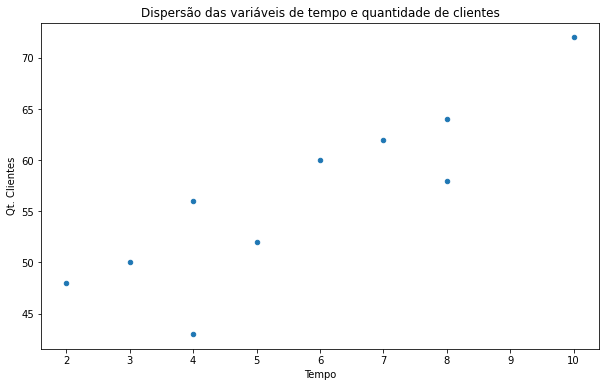

In [30]:
dados.plot.scatter('tempo', 'qtd_clientes')

configurar_plot_com_dimensoes(
    'Dispersão das variáveis de tempo e quantidade de clientes', 
    'Tempo', 
    'Qt. Clientes',
    10,
    6
)

In [31]:
x = dados['tempo'].values
y = dados['qtd_clientes'].values

x_treino, x_teste, y_treino, y_teste = train_test_split(
    x, y, test_size = 0.33, random_state = 42)

x_treino = x_treino.reshape(-1, 1) 
y_treino = y_treino.reshape(-1, 1) 
x_teste = x_teste.reshape(-1, 1) 
y_teste = y_teste.reshape(-1, 1) 

In [32]:
reg = LinearRegression()
reg.fit(x_treino, y_treino)
p = reg.predict(x_teste)

p

array([[62.94318182],
       [45.61363636],
       [56.01136364],
       [42.14772727]])

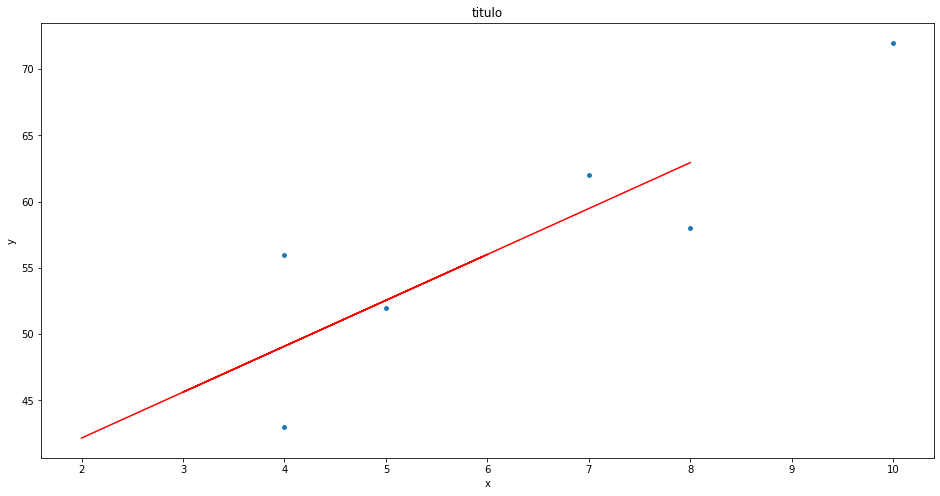

In [33]:
plt.scatter(x_treino, y_treino, s = 15)
plt.plot(x_teste, p, color='r')
configurar_plot('titulo', 'x', 'y')

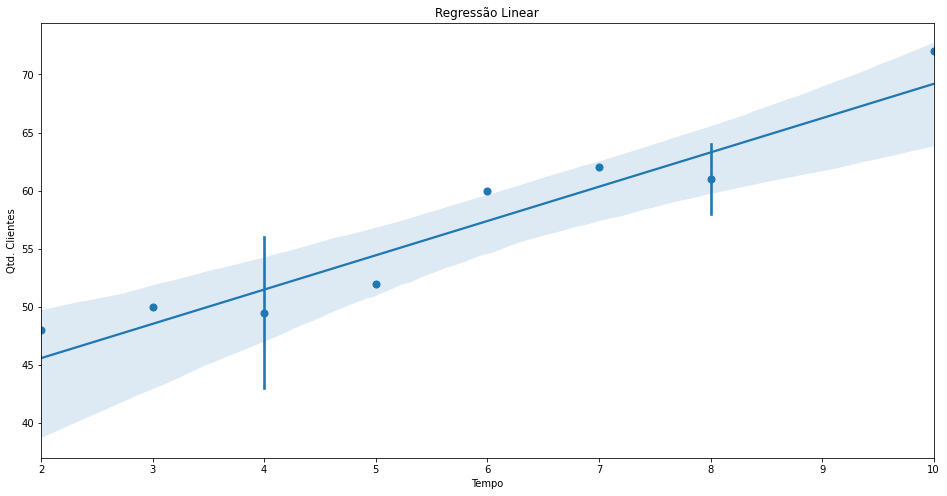

In [34]:
x = dados['tempo']
y = dados['qtd_clientes']

sns.regplot(x = x, y = y, data = dados, x_estimator = np.mean)

configurar_plot('Regressão Linear', 'Tempo', 'Qtd. Clientes')

### Regressão Linear Múltipla

Agora, leremos outro dataset, contendo variáveis a serem analisadas com uma regressão linear múltipla.

In [67]:
dados = pd.read_excel('dados/03 - Regress_ex2.XLS')
dados.head(25)

,ID,x1,x2,x3
0,1,9.95,2,50
1,2,24.45,8,110
2,3,31.75,11,120
3,4,35.00,10,550
4,5,25.02,8,295
5,6,16.86,4,200
6,7,14.38,2,375
7,8,9.60,2,52
8,9,24.35,9,100
9,10,27.50,8,300


In [79]:
x = dados[['x1', 'x2']]
y = dados['x3']

x_treino, x_teste, y_treino, y_teste = train_test_split(
    x, y, test_size = 0.33, random_state = 42)

In [89]:
reg = LinearRegression()
reg.fit(x_treino, y_treino)
p = reg.predict(x_teste)

p

array([106.59393797, 704.26258383, 243.17232337, 310.88161424,
       382.42354616, 318.17803206, 306.24811396, 205.67442895,
       534.15302352])

#### Plotando a regressão linear múltipla entre x1 e x2 com x3 com a biblioteca Seaborn

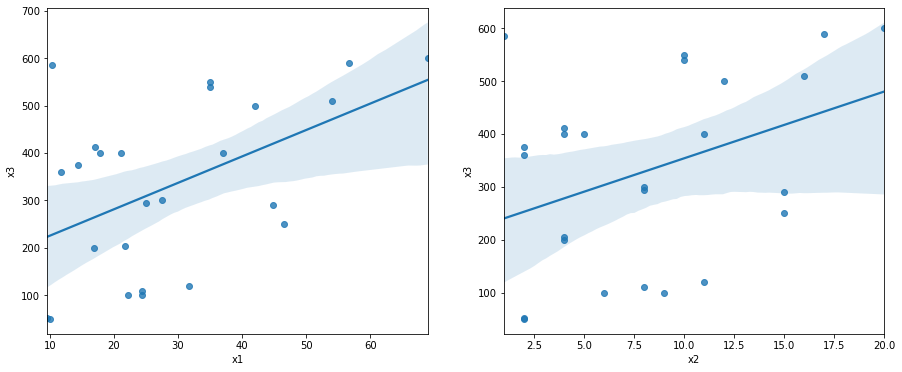

In [108]:
fig, ax = plt.subplots(1, 2)

sns.regplot(
    data = dados,
    x = 'x1',
    y = 'x3',
    ax = ax[0]
)

sns.regplot(
    data = dados,
    x = 'x2',
    y = 'x3',
    ax = ax[1]
)

plt.gcf().set_size_inches(15, 6)
plt.show()